In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import os

os.chdir("/home/ledum/data/LshCas13a_RNA_cleavage/LshCas13a_d10LVM/")

In [9]:
rpmH_TCS_df = pd.read_csv("Results/Tables/Picture_source_tables/Ecd10LVM_rpmH_TCS_raw.tsv", sep="\t")
bla_TCS_df = pd.read_csv("Results/Tables/Picture_source_tables/Ecd10LVM_bla_TCS_raw.tsv", sep="\t")

tcs_metaorf = pd.read_csv("Results/Tables/Picture_source_tables/Ecd10LVM_TCS_across_metaORF.tsv", sep="\t")

In [10]:
bla_TCS_df

,SeqID,Pos,Strand,IJ01_S1,IJ02_S2,IJ03_S3,IJ04_S4,IJ05_S5,IJ06_S6,T_aveLogCPM,NT_aveLogCPM,aveLogFC,Letter
0,pC008,1,+,5.143132,7.083271,4.575873,1.712786,2.381895,1.589950,2.492424,0.966852,1.525572,A
1,pC008,2,+,2.798469,3.510839,2.491308,0.934247,1.071853,0.993719,1.569850,0.080128,1.489722,U
2,pC008,3,+,1.588320,2.155778,1.728663,0.882344,0.655021,0.596231,0.892969,-0.363932,1.256901,G
3,pC008,4,+,2.231212,3.818807,2.338779,0.986150,2.084159,1.987438,1.491968,0.788532,0.703436,A
4,pC008,5,+,2.079943,3.018089,2.491308,0.674734,0.714569,1.059967,1.354465,-0.206949,1.561415,G
5,pC008,6,+,2.798469,3.202870,2.847210,1.193760,1.488685,1.788694,1.580087,0.621569,0.958518,U
6,pC008,7,+,10.324081,12.010764,9.304274,1.712786,1.548232,1.921190,3.403802,0.834314,2.569488,A
7,pC008,8,+,3.554812,4.619525,3.253954,1.349468,0.893211,1.258711,1.941621,0.296617,1.645005,U
8,pC008,9,+,2.609383,3.018089,2.287936,1.349468,1.429137,1.059967,1.421667,0.425800,0.995866,U
9,pC008,10,+,6.769269,6.528928,5.541890,1.920396,1.905516,2.451173,2.662609,1.100072,1.562537,C


In [42]:
def draw_t_nt_barplot(tcs_df, t_subplot, nt_subplot, invisible_subplot, label, rlen):
    def SEM(x):
        return(np.std(x, ddof=1)/np.sqrt(len(x)))
    
    T_columns = ["IJ01_S1", "IJ02_S2", "IJ03_S3"]
    NT_columns = ["IJ04_S4", "IJ05_S5", "IJ06_S6"]
    title_font_size=30
    AA_font_size = 30
    
    ylim = (0, max(tcs_df[T_columns+NT_columns].max()))
    
    for i, row in tcs_df.iterrows():
        
        t_subplot.bar(x = row["Pos"],
                      height = np.mean(row[T_columns]),
                      align = "center",
                      yerr = SEM(row[T_columns]), 
                      error_kw=dict(lw=1, capsize=5, capthick=1),
                      edgecolor="black", 
                      color="red",
                      linewidth=0.5)
        t_subplot.plot(np.repeat(row["Pos"], len(T_columns)), 
                       row[T_columns], 
                       marker="o", 
                       linestyle="None",
                       color="black", markersize=5)
        
        nt_subplot.bar(x = row["Pos"],
                      height = np.mean(row[NT_columns]),
                      align = "center",
                      yerr = SEM(row[NT_columns]), 
                      error_kw=dict(lw=1, capsize=5, capthick=1),
                      edgecolor="black", 
                      color="grey",
                      linewidth=0.5)
        nt_subplot.plot(np.repeat(row["Pos"], len(NT_columns)), 
                        row[NT_columns], 
                        marker="o", 
                        linestyle="None",
                        color="black", markersize=5)
    
    for subplot in (t_subplot, nt_subplot):
        subplot.spines['top'].set_visible(False)
        subplot.spines['right'].set_visible(False)
        subplot.spines['top'].set_visible(False)
        subplot.spines['right'].set_visible(False)
        subplot.tick_params(axis="x", labelsize=title_font_size)
        subplot.tick_params(axis="y", labelsize=title_font_size)
    
    t_subplot.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    t_subplot.set_ylabel("T", size=title_font_size, weight="bold")
    nt_subplot.set_ylabel("NT", size=title_font_size, weight="bold")
    #nt_subplot.set_xlabel("Coding region positions, nt", size=15)
    nt_subplot.set_xticks(tcs_df["Pos"].tolist())
    nt_subplot.set_xticklabels([str(x) for x in tcs_df["Pos"].tolist()])
    
    t_subplot.set_ylim(ylim)
    nt_subplot.set_ylim(ylim)
    
    rect_wh = ylim[1]*0.15
    rectangle_array = list()

    codon_list = list()
    for i in range(0, len(tcs_df), rlen):
        codon_list.append(tcs_df.sort_values(by="Pos")["Letter"].tolist()[i:(i+3)])

    for i in range(len(tcs_df)//rlen):
        if i % 2 == 0:
            r_color = "grey"
        else:
            r_color = "lightgrey"
        rectangle_array.append(Rectangle((i*rlen+0.5, -rect_wh*1.2), rlen, rect_wh, clip_on=False, facecolor=r_color))

    for r, codon in zip(rectangle_array, codon_list):
        t_subplot.add_patch(r)
        rx, ry = r.get_xy()
        text_y = ry + r.get_height()/2
        for i, letter in enumerate(codon):
            text_x = rx + i*r.get_width()/rlen + r.get_width()/(rlen*2)
            t_subplot.annotate(codon[i], (text_x, text_y), size=AA_font_size, color="black", weight="bold", ha="center", va="center", annotation_clip=False)
    
    invisible_subplot.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    invisible_subplot.set_ylabel("5' ends coverage, CPM", size=title_font_size, labelpad=60)
    #invisible_subplot.set_title(label, size=title_font_size, loc='left', weight="bold")
    invisible_subplot.set_title(label, 
                                size=title_font_size, 
                                weight="bold",
                                position=(0.01, 0.95), 
                                horizontalalignment='left', 
                                transform=invisible_subplot.transAxes)

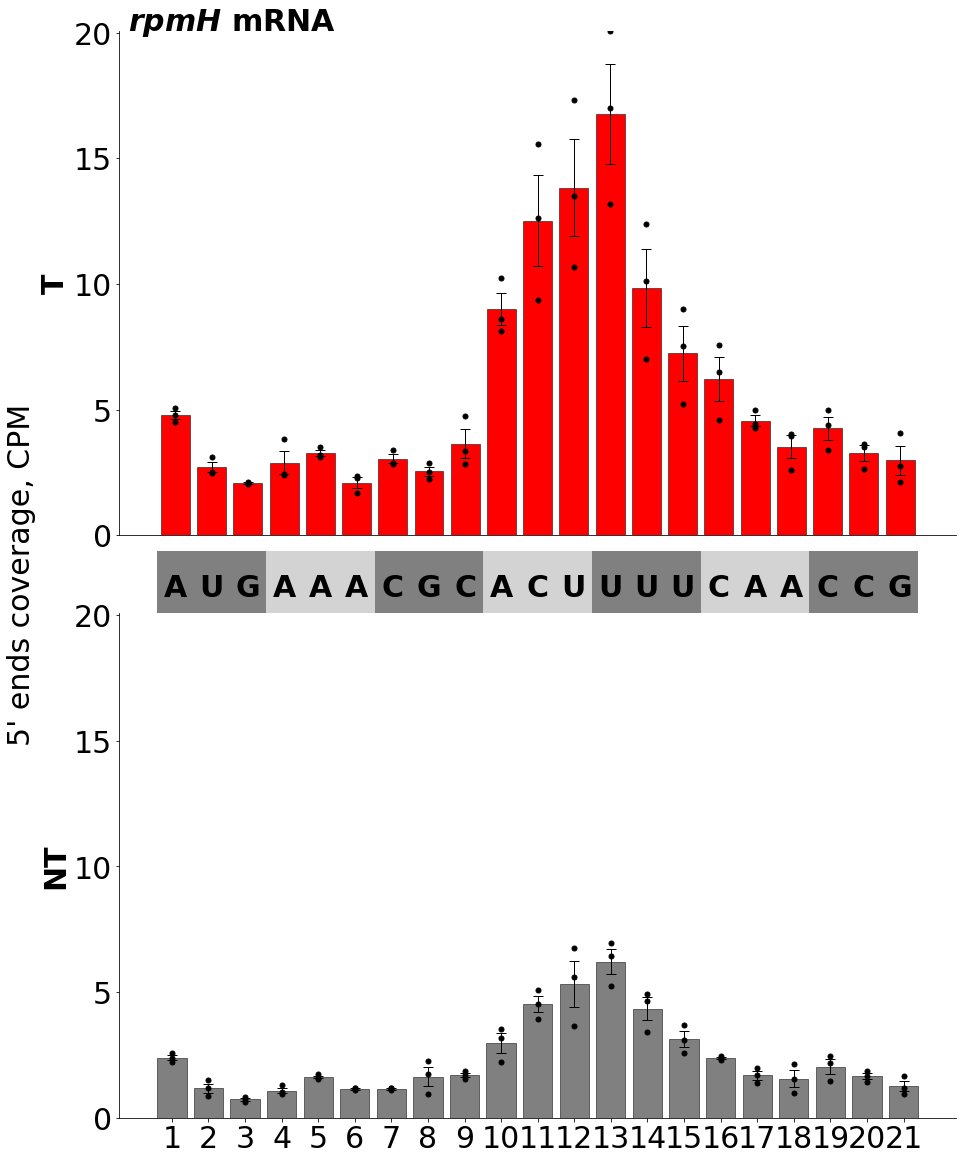

In [43]:
figure = plt.figure(figsize=(15,20))

grid = plt.GridSpec(10, 1, wspace=0.2, hspace=2)

rpmH_TCS_t_plot = figure.add_subplot(grid[0:5, 0:1])
rpmH_TCS_nt_plot = figure.add_subplot(grid[5:10, 0:1])
rpmH_TCS_invisible_plot = figure.add_subplot(grid[0:10, 0:1], frameon=False)

draw_t_nt_barplot(rpmH_TCS_df, 
                  t_subplot=rpmH_TCS_t_plot, 
                  nt_subplot=rpmH_TCS_nt_plot, 
                  invisible_subplot=rpmH_TCS_invisible_plot, 
                  label="$\mathbf{rpmH}$ mRNA", rlen=3)

figure.savefig("Results/Pictures/Ecd10LVM_rpmH_N5E_coverage.png", dpi=200)

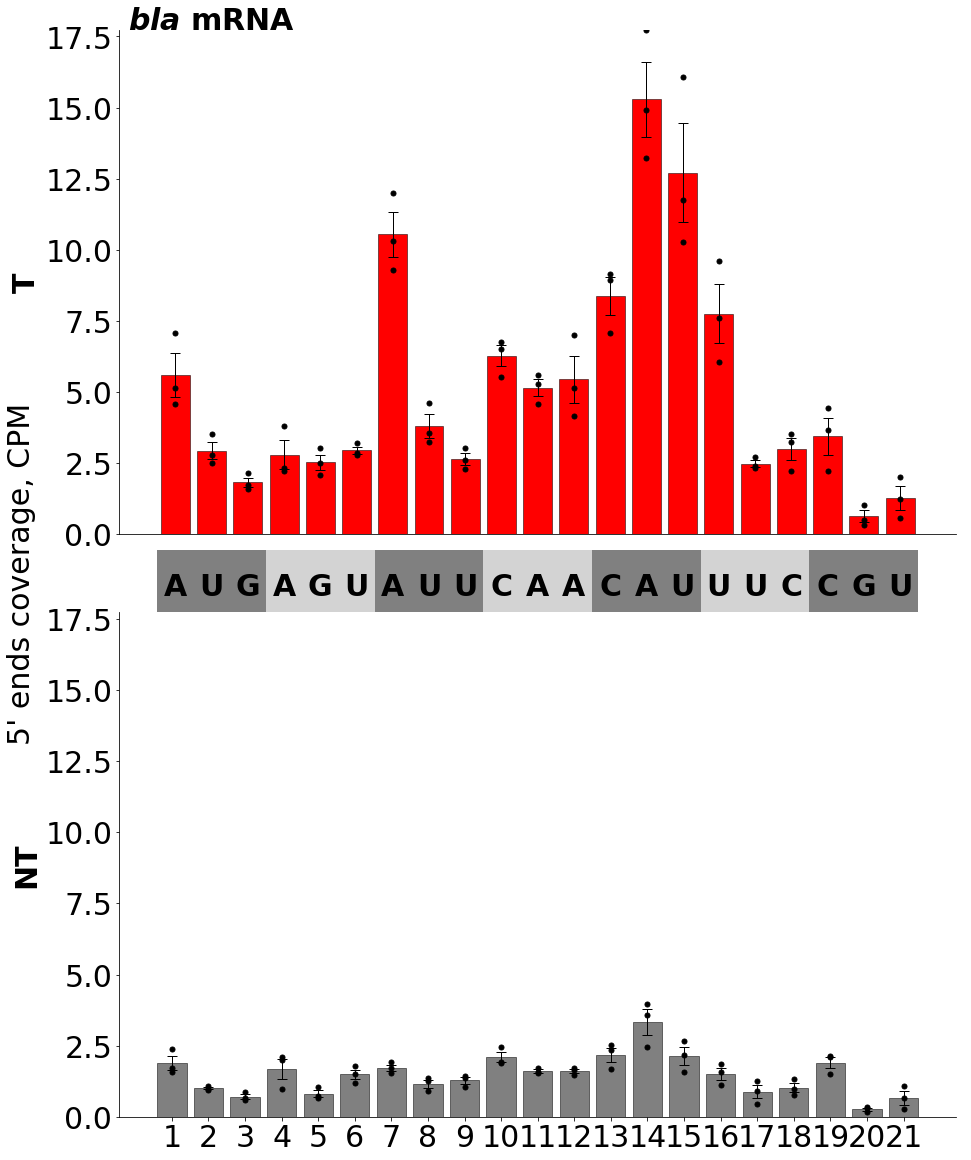

In [44]:
figure = plt.figure(figsize=(15,20))

grid = plt.GridSpec(10, 1, wspace=0.2, hspace=2)

bla_TCS_t_plot = figure.add_subplot(grid[0:5, 0:1])
bla_TCS_nt_plot = figure.add_subplot(grid[5:10, 0:1])
bla_TCS_invisible_plot = figure.add_subplot(grid[0:10, 0:1], frameon=False)

draw_t_nt_barplot(bla_TCS_df, 
                  t_subplot=bla_TCS_t_plot, 
                  nt_subplot=bla_TCS_nt_plot, 
                  invisible_subplot=bla_TCS_invisible_plot, 
                  label="$\mathbf{bla}$ mRNA", rlen=3)

figure.savefig("Results/Pictures/Ecd10LVM_bla_N5E_coverage.png", dpi=200)

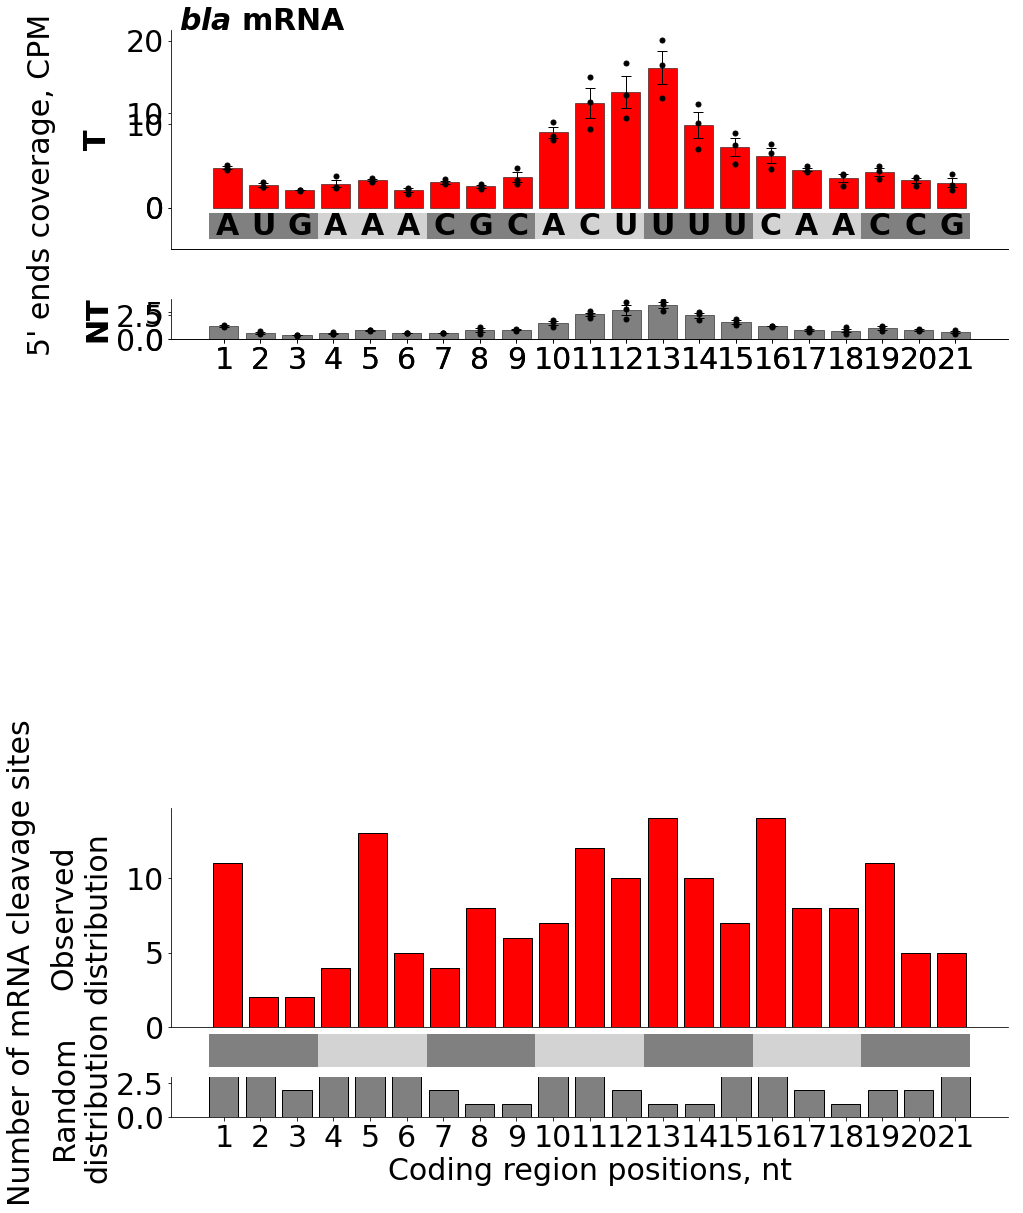

In [33]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['mathtext.bf'] = 'Arial:italic:bold'

figure = plt.figure(figsize=(15,20))

grid = plt.GridSpec(37, 1, wspace=0.2, hspace=2)

bla_TCS_t_plot = figure.add_subplot(grid[0:8, 0:1])
bla_TCS_nt_plot = figure.add_subplot(grid[9:11, 0:1])
bla_TCS_invisible_plot = figure.add_subplot(grid[0:11, 0:1], frameon=False)

rpmH_TCS_t_plot = figure.add_subplot(grid[13:16, 0:1])
rpmH_TCS_nt_plot = figure.add_subplot(grid[17:24, 0:1])
rpmH_TCS_invisible_plot = figure.add_subplot(grid[13:24, 0:1], frameon=False)

draw_t_nt_barplot(bla_TCS_df, 
                  t_subplot=bla_TCS_t_plot, 
                  nt_subplot=bla_TCS_nt_plot, 
                  invisible_subplot=bla_TCS_invisible_plot, 
                  label="$\mathbf{bla}$ mRNA", rlen=3)

draw_t_nt_barplot(rpmH_TCS_df, 
                  t_subplot=rpmH_TCS_t_plot, 
                  nt_subplot=rpmH_TCS_nt_plot, 
                  invisible_subplot=rpmH_TCS_invisible_plot, 
                  label="$\mathbf{rpmH}$ mRNA", rlen=3)

#draw TCS across ORFs
tcs_metaorf_ylim = (0, max(tcs_metaorf["DistFromORFReal"].tolist() + tcs_metaorf["DistFromORFRnd"].tolist())*1.05)

tcs_metaorf_real_plot = figure.add_subplot(grid[26:34, 0:1])
tcs_metaorf_rand_plot = figure.add_subplot(grid[35:37, 0:1])

tcs_metaorf_real_plot.spines['top'].set_visible(False)
tcs_metaorf_real_plot.spines['right'].set_visible(False)
tcs_metaorf_rand_plot.spines['top'].set_visible(False)
tcs_metaorf_rand_plot.spines['right'].set_visible(False)
#tcs_metaorf_rand_plot.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

tcs_metaorf_real_plot.bar(x=tcs_metaorf["Dist"].tolist(), 
                          height=tcs_metaorf["DistFromORFReal"].tolist(), 
                          align="center", 
                          color="red", 
                          edgecolor="black", 
                          linewidth=1)
tcs_metaorf_rand_plot.bar(x=tcs_metaorf["Dist"].tolist(), 
                          height=tcs_metaorf["DistFromORFRnd"].tolist(), 
                          align="center", 
                          color="grey", 
                          edgecolor="black", 
                          linewidth=1)

title_font_size = 30

tcs_metaorf_real_plot.set_ylim(tcs_metaorf_ylim)
tcs_metaorf_rand_plot.set_ylim(0, tcs_metaorf_ylim[1]/5)

tcs_metaorf_real_plot.tick_params(axis="x", labelsize=title_font_size)
tcs_metaorf_real_plot.tick_params(axis="y", labelsize=title_font_size)
tcs_metaorf_rand_plot.tick_params(axis="x", labelsize=title_font_size)
tcs_metaorf_rand_plot.tick_params(axis="y", labelsize=title_font_size)

tcs_metaorf_rand_plot.set_ylabel("Random\ndistribution", size=title_font_size)
tcs_metaorf_real_plot.set_ylabel("Observed\ndistribution", size=title_font_size)

tcs_metaorf_rand_plot.set_xticks(tcs_metaorf["Dist"].tolist())
tcs_metaorf_rand_plot.set_xticklabels([str(x+1) for x in range(len(tcs_metaorf))])
tcs_metaorf_real_plot.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

tcs_metaorf_rand_plot.set_xlabel("Coding region positions, nt", size=title_font_size)

invisible_subplot_metaorf = figure.add_subplot(grid[26:37, 0:1], frameon=False)
invisible_subplot_metaorf.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
invisible_subplot_metaorf.set_ylabel("Number of mRNA cleavage sites", labelpad=80, size=title_font_size)
#invisible_subplot_metaorf.set_title("Distribution of top-1000 of predicted mRNA cleavage sites across coding regions", size=18)

metaorf_rect_wh = tcs_metaorf_ylim[1]*0.15
metaorf_rectangle_array = list()

for i in range(len(tcs_metaorf)//3):
    if i % 2 == 0:
        r_color = "grey"
    else:
        r_color = "lightgrey"
    metaorf_rectangle_array.append(Rectangle((i*3-0.5, -metaorf_rect_wh*1.2), 3, metaorf_rect_wh, clip_on=False, facecolor=r_color))

for r in metaorf_rectangle_array:
    tcs_metaorf_real_plot.add_patch(r)

met_cx, met_cy = metaorf_rectangle_array[0].get_xy()
met_tx = met_cx + metaorf_rectangle_array[0].get_width()/2
met_ty = met_cy + metaorf_rectangle_array[0].get_height()/2

figure.align_labels()

In [5]:
from datetime import datetime
date = datetime.now().date()

date_suffix = "_%i_%i_%i" % (date.day, date.month, date.year)

figure.savefig("Drafts/Final_pictures_20_May/WT_TCS_examples_SEM" + date_suffix + ".png", bbox_inches = "tight", dpi=200)
figure.savefig("Drafts/Final_pictures_20_May/WT_TCS_examples_SEM" + date_suffix + ".svg", bbox_inches = "tight", dpi=200)

In [6]:
top1000_tcs_metaorf = pd.read_csv("LshCas13a_data/Results/Tables/Picture_source_tables/WT_TCS_across_metaORF_big_scale.tsv", sep="\t")

In [24]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['mathtext.bf'] = 'Arial:italic:bold'

figure = plt.figure(figsize=(15,20))
grid = plt.GridSpec(10, 1, wspace=0.2, hspace=2)

tcs_metaorf_ylim = (0, max(top1000_tcs_metaorf["DistFromORFReal"].tolist() + 
                           top1000_tcs_metaorf["DistFromORFRnd"].tolist())*1.05)

tcs_metaorf_real_plot = figure.add_subplot(grid[0:5, 0:1])
tcs_metaorf_rand_plot = figure.add_subplot(grid[5:10, 0:1])

tcs_metaorf_real_plot.spines['top'].set_visible(False)
tcs_metaorf_real_plot.spines['right'].set_visible(False)
tcs_metaorf_rand_plot.spines['top'].set_visible(False)
tcs_metaorf_rand_plot.spines['right'].set_visible(False)

tcs_metaorf_real_plot.bar(x=top1000_tcs_metaorf["Dist"].tolist(), 
                          height=top1000_tcs_metaorf["DistFromORFReal"].tolist(), 
                          align="center", 
                          color="red", 
                          edgecolor="red", 
                          linewidth=1)
tcs_metaorf_rand_plot.bar(x=top1000_tcs_metaorf["Dist"].tolist(), 
                          height=top1000_tcs_metaorf["DistFromORFRnd"].tolist(), 
                          align="center", 
                          color="grey", 
                          edgecolor="grey", 
                          linewidth=1)

title_font_size = 30

tcs_metaorf_real_plot.set_ylim(tcs_metaorf_ylim)
tcs_metaorf_rand_plot.set_ylim(tcs_metaorf_ylim)

tcs_metaorf_real_plot.tick_params(axis="x", labelsize=title_font_size)
tcs_metaorf_real_plot.tick_params(axis="y", labelsize=title_font_size)
tcs_metaorf_rand_plot.tick_params(axis="x", labelsize=title_font_size)
tcs_metaorf_rand_plot.tick_params(axis="y", labelsize=title_font_size)

tcs_metaorf_rand_plot.set_ylabel("Random\ndistribution", size=title_font_size)
tcs_metaorf_real_plot.set_ylabel("Observed\ndistribution", size=title_font_size)

tcs_metaorf_rand_plot.set_xlabel("Coding region positions, nt", size=title_font_size)

invisible_subplot_metaorf = figure.add_subplot(grid[0:10, 0:1], frameon=False)
invisible_subplot_metaorf.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
invisible_subplot_metaorf.set_ylabel("Number of mRNA cleavage sites", labelpad=80, size=title_font_size)

figure.align_labels()

NameError: name 'top1000_tcs_metaorf' is not defined

<Figure size 1080x1440 with 0 Axes>

In [9]:
figure.savefig("Drafts/Final_pictures_20_May/WT_mRNA_cleavage_big_scale.png", bbox_inches = "tight", dpi=200)
figure.savefig("Drafts/Final_pictures_20_May/WT_mRNA_cleavage_big_scale.svg", bbox_inches = "tight", dpi=200)

In [51]:
bla_TCS_TSS = pd.read_csv("LshCas13a_data/Results/Tables/Picture_source_tables/WT_bla_TCS_surroundings_raw.tsv", sep="\t")

NameError: name 'bla_TCS_TSS' is not defined

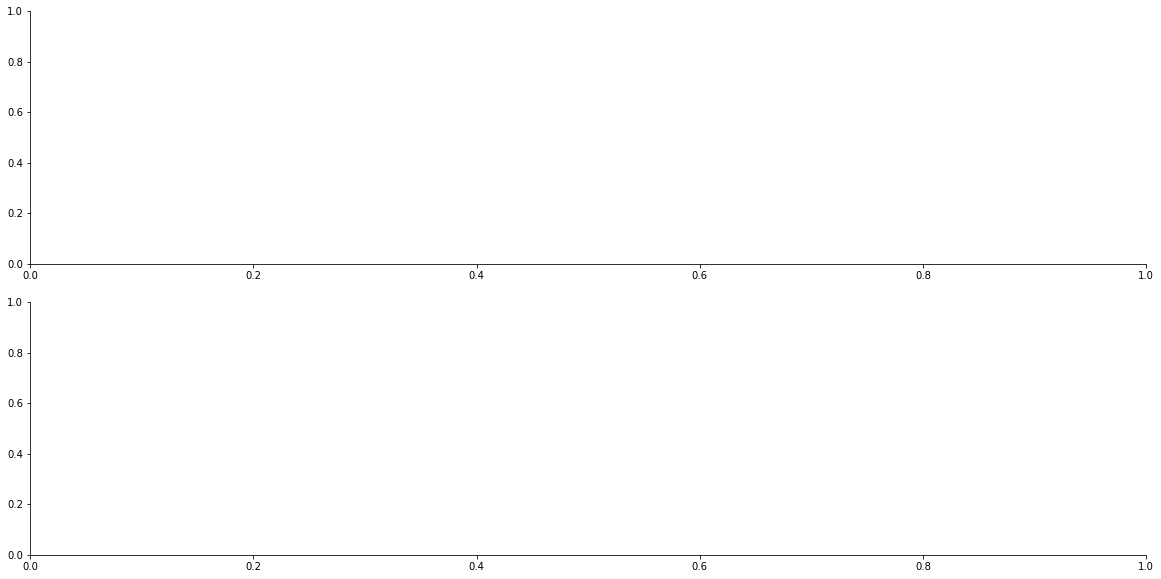

In [23]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['mathtext.bf'] = 'Arial:italic:bold'

figure = plt.figure(figsize=(20,10))
grid = plt.GridSpec(10, 1, wspace=0.2, hspace=2)

T_plot = figure.add_subplot(grid[0:5, 0:1])
NT_plot = figure.add_subplot(grid[5:10, 0:1])

T_plot.spines['top'].set_visible(False)
T_plot.spines['right'].set_visible(False)
NT_plot.spines['top'].set_visible(False)
NT_plot.spines['right'].set_visible(False)

def SEM(x):
    return(np.std(x, ddof=1)/np.sqrt(len(x)))

T_columns = ["IJ01_S1", "IJ02_S2", "IJ03_S3"]
NT_columns = ["IJ04_S4", "IJ05_S5", "IJ06_S6"]
title_font_size=30
AA_font_size = 30

ylim = (0, max(bla_TCS_TSS[T_columns+NT_columns].max())*1.05)

for i, row in bla_TCS_TSS.iterrows():

    T_plot.bar(x = row["Pos"],
                  height = np.mean(row[T_columns]),
                  align = "center",
                  yerr = SEM(row[T_columns]), 
                  error_kw=dict(lw=1, capsize=5, capthick=1),
                  edgecolor="black", 
                  color="red",
                  linewidth=0.5)
    T_plot.plot(np.repeat(row["Pos"], len(T_columns)), 
                   row[T_columns], 
                   marker="o", 
                   linestyle="None",
                   color="black", markersize=5)

    NT_plot.bar(x = row["Pos"],
                  height = np.mean(row[NT_columns]),
                  align = "center",
                  yerr = SEM(row[NT_columns]), 
                  error_kw=dict(lw=1, capsize=5, capthick=1),
                  edgecolor="black", 
                  color="grey",
                  linewidth=0.5)
    NT_plot.plot(np.repeat(row["Pos"], len(NT_columns)), 
                    row[NT_columns], 
                    marker="o", 
                    linestyle="None",
                    color="black", markersize=5)

T_plot.set_ylim(ylim)
NT_plot.set_ylim(ylim)